In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# print(weather_api_key)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#print(cities)

593

In [3]:
# Save API information
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial"

cities_df = pd.DataFrame()


In [4]:
for city in cities:
    query_url = url + "&appid=" + weather_api_key + "&q=" + city
    
    # Make API call
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    #print(weather_json)
    # Parse JSON data
    all_cities = []
    
    response_code = weather_json["cod"]
    if(response_code == 200):
        lat = weather_json["coord"]["lat"]
        lon = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        name = weather_json["name"]
        wind_speed = weather_json["wind"]["speed"]
        cloudiness = weather_json["clouds"]["all"]
        max_temp = weather_json["main"]["temp_max"]
        country = weather_json["sys"]["country"]
        
        new_row = {"Latitude":[lat],"Longitude":[lon],"Temperature":[temp],"Max Temp":[max_temp],"Humidity":[humidity],"City":[name],"Country":[country],"Wind Speed":[wind_speed],"Cloudiness":cloudiness}
        temp_df = pd.DataFrame(new_row)
        
        #print(temp_df)
        #print(new_row)
        # Insert data into dataframe
        #cities_df = cities_df.append(temp_df)
        cities_df = pd.concat([cities_df,temp_df], axis=0)
cities_df

,Latitude,Longitude,Temperature,Max Temp,Humidity,City,Country,Wind Speed,Cloudiness
0,-15.1961,12.1522,58.51,58.51,91,Mossamedes,AO,4.18,27
0,42.6001,-73.9662,65.16,66.52,76,Albany,US,2.13,100
0,-34.5833,150.8552,66.06,66.06,56,Flinders,AU,6.11,4
0,71.9167,114.0833,52.38,52.38,80,Saskylakh,RU,14.23,100
0,-6.2222,-57.7528,74.17,74.17,70,Jacareacanga,BR,2.59,67
...,...,...,...,...,...,...,...,...,...
0,49.5786,42.7360,84.70,84.70,21,Serafimovich,RU,20.45,100
0,62.5353,113.9611,55.17,55.17,81,Mirny,RU,8.55,98
0,4.4133,32.5678,69.58,69.58,93,Torit,SS,2.57,100
0,64.5667,143.2000,69.85,69.85,37,Ust-Nera,RU,4.09,26


In [5]:
# Save dataframe to CSV
cities_df.to_csv(output_data_file)

# Scatter Plot of Temperature(F) vs Latitude

<AxesSubplot:xlabel='Latitude', ylabel='Temperature'>

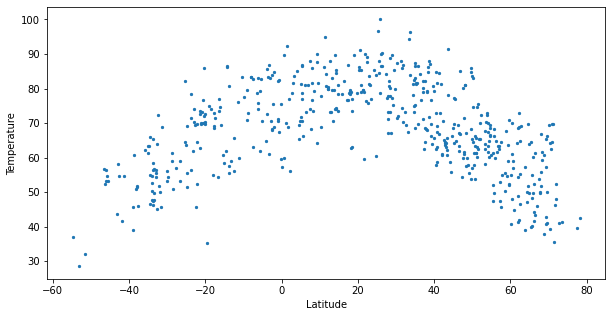

In [6]:
# scatter plot Temperature(F) vs. Latitude
cities_df.plot.scatter(x="Latitude",y="Temperature", s=5, figsize = (10, 5))


# Analysis of Temperature vs Latitude
Around the equator, at Latitude zero the temperature is hot. And, as you go towards the poles it cools down.


<AxesSubplot:xlabel='Latitude', ylabel='Temperature'>

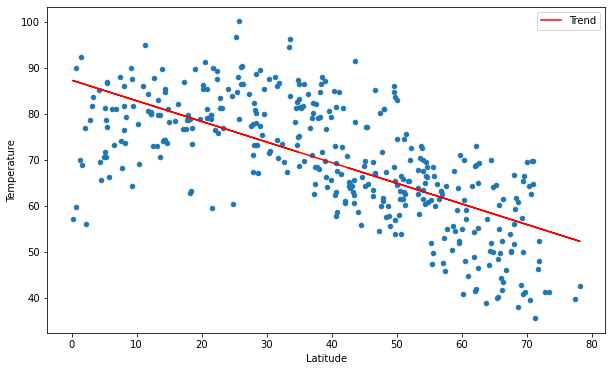

In [7]:
# showing a Linear Regression
temp_lat_df = cities_df.query('Latitude >= 0')[['Latitude','Temperature']]
x = temp_lat_df["Latitude"].tolist()
y = temp_lat_df["Temperature"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
temp_lat_df.insert(len(temp_lat_df.columns),'Trend',t)

# Plot data
ax = temp_lat_df.plot.scatter(x='Latitude', y='Temperature')
temp_lat_df.plot.line(x='Latitude',
                   y='Trend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))


# Analysis of Temperature vs Latitude for the Northern Hemishphere
Latitude zero is where the equator sits at, and that's where the temperature is the highest, generating the most sun light. It decreases when it moves towards the northern part of the hemisphere.

<AxesSubplot:xlabel='Latitude', ylabel='Temperature'>

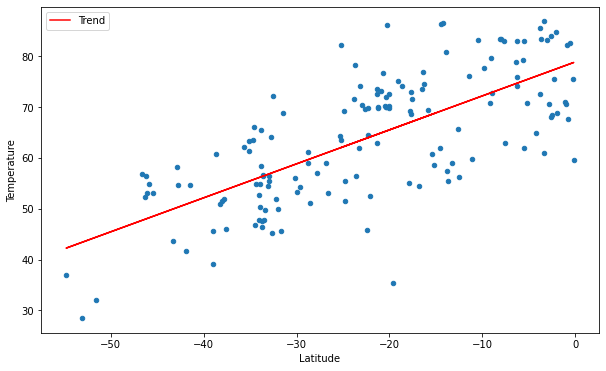

In [8]:
# showing a Linear Regression
temp_lat_df = cities_df.query('Latitude <= 0')[['Latitude','Temperature']]
x = temp_lat_df["Latitude"].tolist()
y = temp_lat_df["Temperature"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
temp_lat_df.insert(len(temp_lat_df.columns),'Trend',t)

# Plot data
ax = temp_lat_df.plot.scatter(x='Latitude', y='Temperature')
temp_lat_df.plot.line(x='Latitude',
                   y='Trend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Temperature vs Latitude for the Southern Hemisphere
The Temperature increases as you move towards the equator, which is at latitude zero.


# Scatter Plot of Humidity(%) vs Latitude

<AxesSubplot:xlabel='Latitude', ylabel='Humidity'>

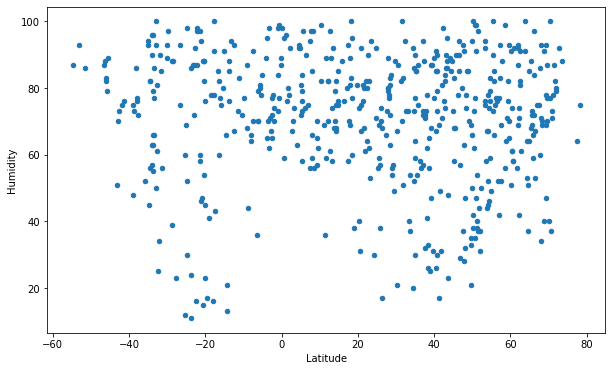

In [9]:
# scatter plot Humidity(%) vs. Latitude
cities_df.plot.scatter(x="Latitude",y="Humidity", figsize = (10, 6))

# Analysis of Humidity vs Latitude
Humidity occurs most often between -30 degrees and -20 degrees, and between 20 degrees and 50 degrees of latitude.

<AxesSubplot:xlabel='Latitude', ylabel='Humidity'>

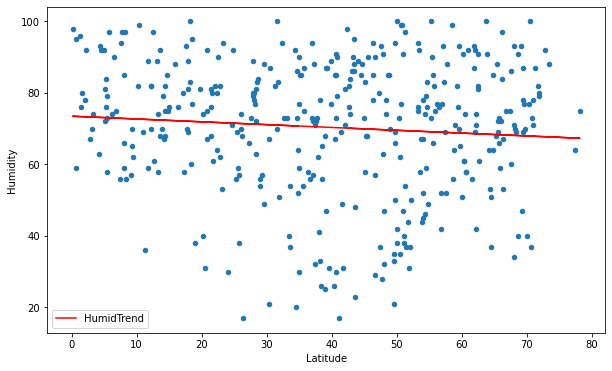

In [10]:
# showing a Linear Regression
humid_lat_df = cities_df.query('Latitude >= 0')[['Latitude','Humidity']]
x = humid_lat_df["Latitude"].tolist()
y = humid_lat_df["Humidity"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
humid_lat_df.insert(len(humid_lat_df.columns),'HumidTrend',t)

# Plot data
ax = humid_lat_df.plot.scatter(x='Latitude', y='Humidity')
humid_lat_df.plot.line(x='Latitude',
                   y='HumidTrend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))


# Analysis of Humidity vs Latitude for the Northern Hemisphere
Humidity slowly drops moving from the equator to the North pole

<AxesSubplot:xlabel='Latitude', ylabel='Humidity'>

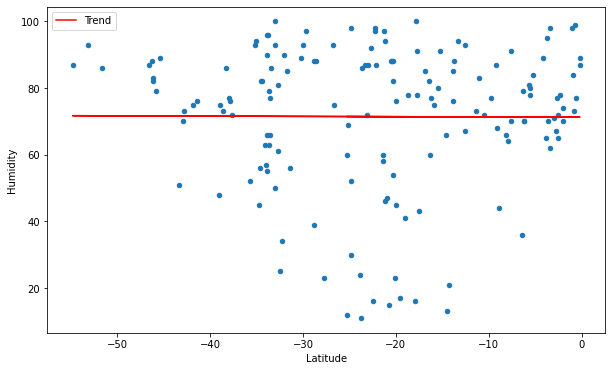

In [11]:
# showing a Linear Regression
humid_lat_df = cities_df.query('Latitude <= 0')[['Latitude','Humidity']]
x = humid_lat_df["Latitude"].tolist()
y = humid_lat_df["Humidity"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
humid_lat_df.insert(len(humid_lat_df.columns),'Trend',t)

# Plot data
ax = humid_lat_df.plot.scatter(x='Latitude', y='Humidity')
humid_lat_df.plot.line(x='Latitude',
                   y='Trend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Humidity vs Latitude for the Southern Hemisphere
Humidity for the Southern hemisphere is fairly consistent between the pole and the equator

# Scatter Plot of Cloudiness vs Latitude

<AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'>

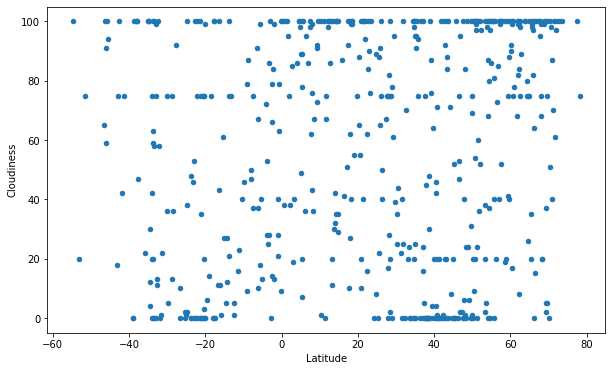

In [12]:
# scatter plot Cloudiness(%) vs. Latitude
cities_df.plot.scatter(x="Latitude",y="Cloudiness", figsize = (10, 6))

# Analysis of Cloudiness vs Latitude
It looks like the northern hemisphere is a lot more cloudy than the southern hemphishere.

<AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'>

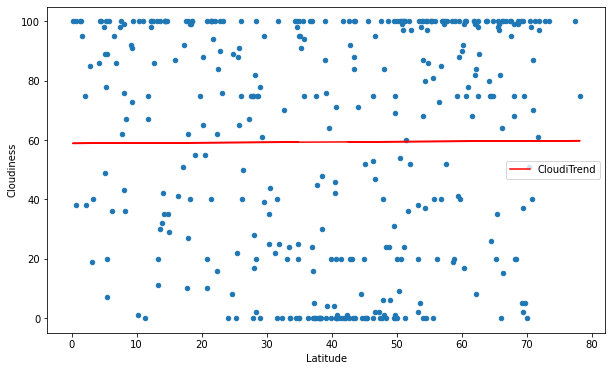

In [13]:
# showing a Linear Regression of the overall latitude
cloud_lat_df = cities_df.query('Latitude >= 0')[['Latitude','Cloudiness']]
x = cloud_lat_df["Latitude"].tolist()
y = cloud_lat_df["Cloudiness"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
cloud_lat_df.insert(len(cloud_lat_df.columns),'CloudiTrend',t)

# Plot data
ax = cloud_lat_df.plot.scatter(x='Latitude', y='Cloudiness')
cloud_lat_df.plot.line(x='Latitude',
                   y='CloudiTrend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Cloudiness vs Latitude in the Northern Hemisphere
The level of clouds is reduced as you move away from the equator towards the North pole

<AxesSubplot:xlabel='Latitude', ylabel='Cloudiness'>

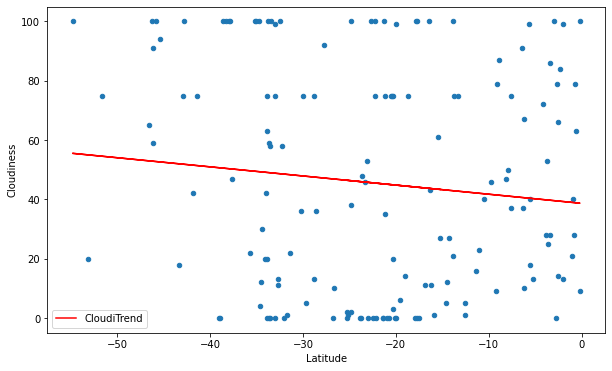

In [14]:
# showing a Linear Regression of the overall latitude
cloud_lat_df = cities_df.query('Latitude <= 0')[['Latitude','Cloudiness']]
x = cloud_lat_df["Latitude"].tolist()
y = cloud_lat_df["Cloudiness"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
cloud_lat_df.insert(len(cloud_lat_df.columns),'CloudiTrend',t)

# Plot data
ax = cloud_lat_df.plot.scatter(x='Latitude', y='Cloudiness')
cloud_lat_df.plot.line(x='Latitude',
                   y='CloudiTrend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Cloudiness vs Latitude in the Southern Hemisphere
The level of clouds is reduced as you move towards the equator from the South pole

# Scatter Plot of Wind Speed (mph) vs Latitude

<AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'>

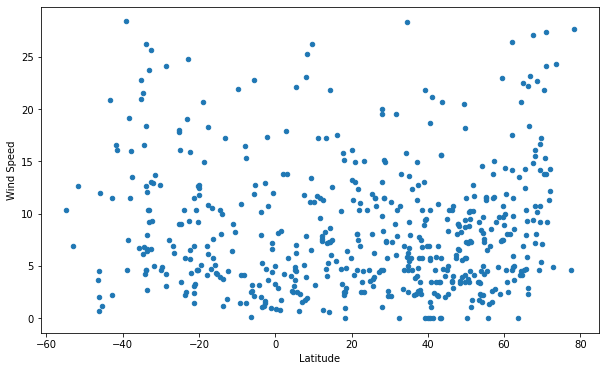

In [15]:
# Wind Speed (mph) vs. Latitude
cities_df.plot.scatter(x="Latitude",y="Wind Speed", figsize = (10, 6))


# Analysis of Wind Speed vs Latitude
The wind speed is pretty low and it's evenly distributed across all latitudes.

<AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'>

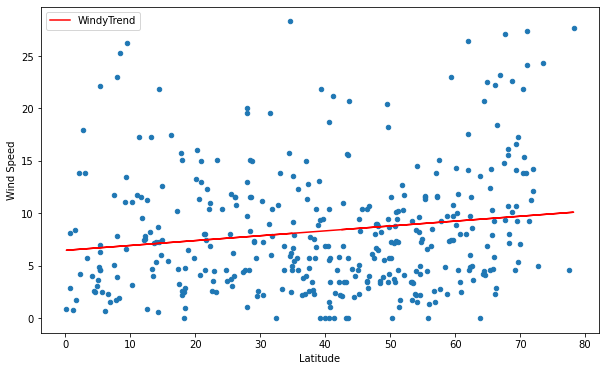

In [16]:
# showing a Linear Regression the overal latitude
wind_lat_df = cities_df.query('Latitude >= 0')[['Latitude','Wind Speed']]
x = wind_lat_df["Latitude"].tolist()
y = wind_lat_df["Wind Speed"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
wind_lat_df.insert(len(wind_lat_df.columns),'WindyTrend',t)

# Plot data
ax = wind_lat_df.plot.scatter(x='Latitude', y='Wind Speed')
wind_lat_df.plot.line(x='Latitude',
                   y='WindyTrend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Wind Speed vs Latitude in the Northern Hemisphere
The wind speed for the Northern hemisphere is pretty steady, low, and evenly distributed.


<AxesSubplot:xlabel='Latitude', ylabel='Wind Speed'>

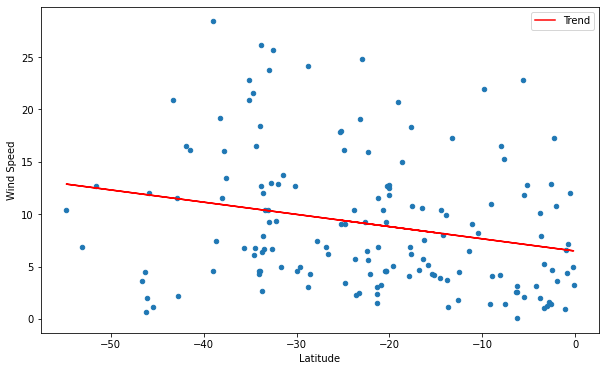

In [17]:
# showing a Linear Regression of the northern hemisphere
wind_lat_df = cities_df.query('Latitude <= 0')[['Latitude','Wind Speed']]
x = wind_lat_df["Latitude"].tolist()
y = wind_lat_df["Wind Speed"].tolist()

# Find slope using stats.linregress and the tempeature and latititude columns' data
m = stats.linregress(x, y)

# Using slope, calculate the regression line's points
t = [m.slope * i + m.intercept for i in x]

# Insert regression line data into dataframe as a new column
wind_lat_df.insert(len(wind_lat_df.columns),'Trend',t)

# Plot data
ax = wind_lat_df.plot.scatter(x='Latitude', y='Wind Speed')
wind_lat_df.plot.line(x='Latitude',
                   y='Trend',
                   color='red',
                   ax=ax,
                   figsize = (10,6))

# Analysis of Wind Speed vs Latitdue in the Southern Hemisphere
The wind decreases as you move towards the equator, at latitude zero.